In [125]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import pandas as pd

import pickle

plt.rcParams["figure.figsize"] = (15,10)

We choose to work on the LHC dataset.
<br>And I will be specifically working on the Low pt dataset (250-500).

In [54]:
higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
higgs

<_io.BufferedReader name='higgs_100000_pt_250_500.pkl'>

In [55]:
qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
qcd

<_io.BufferedReader name='qcd_100000_pt_250_500.pkl'>

In [56]:
data_higgs = pickle.load(higgs)
data_higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [57]:
data_qcd = pickle.load(qcd)
data_qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [58]:
higgs.close()
qcd.close()

In [60]:
data_higgs

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [61]:
data_qcd

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


# 1.

We've loaded our data, so we'll see how the signal and background data compare for each feature.

In [77]:
print(np.max(data_higgs['pt']))
print(np.min(data_higgs['pt']))
print(np.max(data_qcd['pt']))
print(np.min(data_qcd['pt']))

494.20547685154884
250.07679864765817
499.9998402107349
250.12510135431387


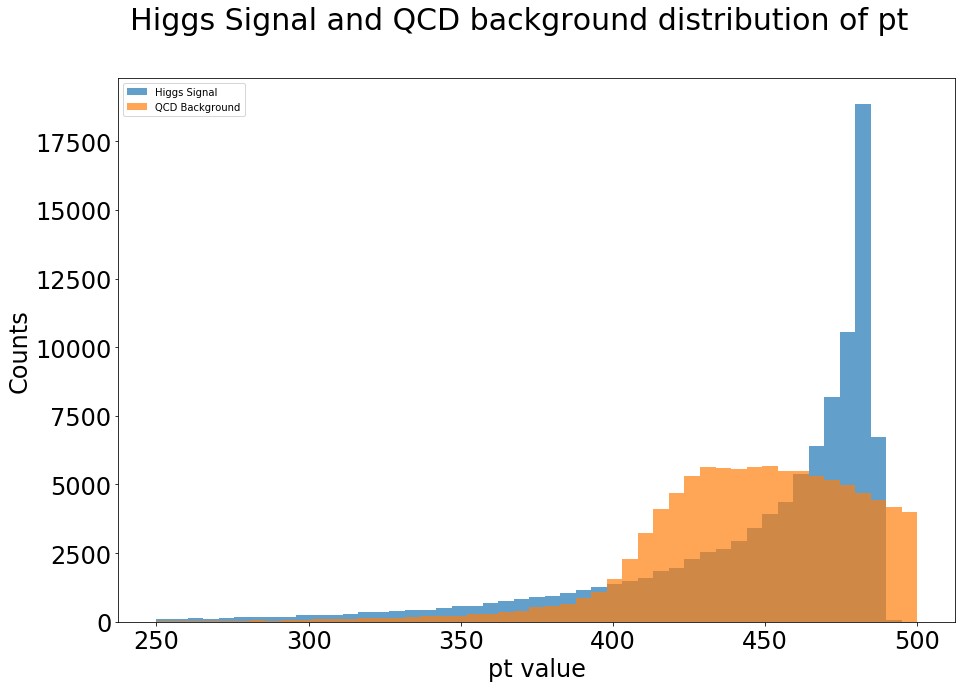

In [126]:
plt.suptitle('Higgs Signal and QCD background distribution of pt ', fontsize=30)
plt.xlabel('pt value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['pt'], bins = np.linspace(250,500,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['pt'], bins = np.linspace(250,500,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [78]:
print(np.max(data_higgs['eta']))
print(np.min(data_higgs['eta']))
print(np.max(data_qcd['eta']))
print(np.min(data_qcd['eta']))

3.264194698314869
-3.202213162003274
3.192602898050439
-3.240244155525688


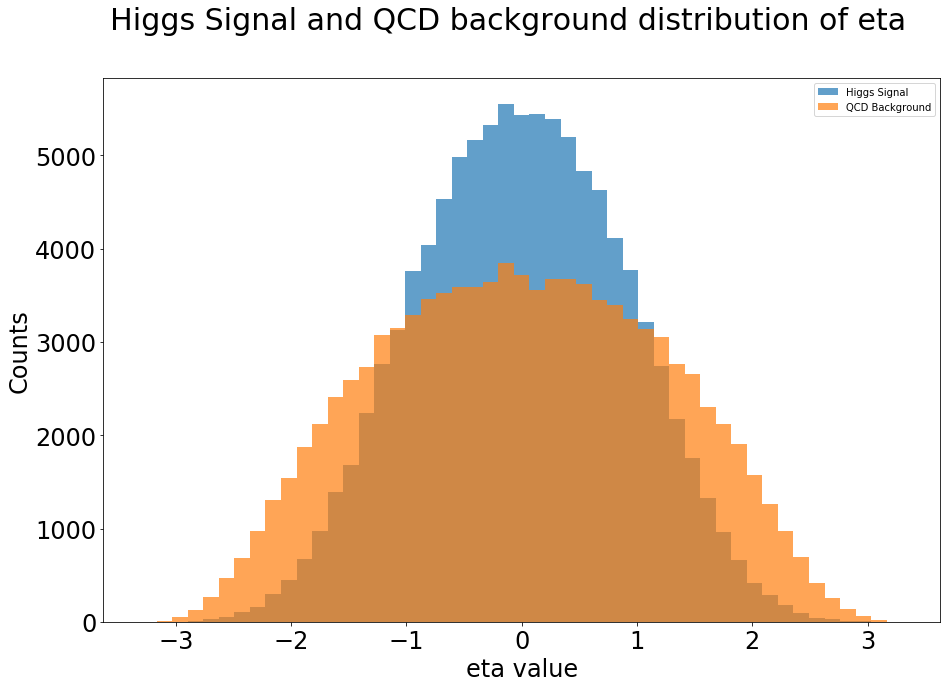

In [127]:
plt.suptitle('Higgs Signal and QCD background distribution of eta', fontsize=30)
plt.xlabel('eta value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['eta'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['eta'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [82]:
print(np.max(data_higgs['phi']))
print(np.min(data_higgs['phi']))
print(np.max(data_qcd['phi']))
print(np.min(data_qcd['phi']))

3.1414441448832293
-3.141586635679087
3.1415720573843084
-3.1415368791145792


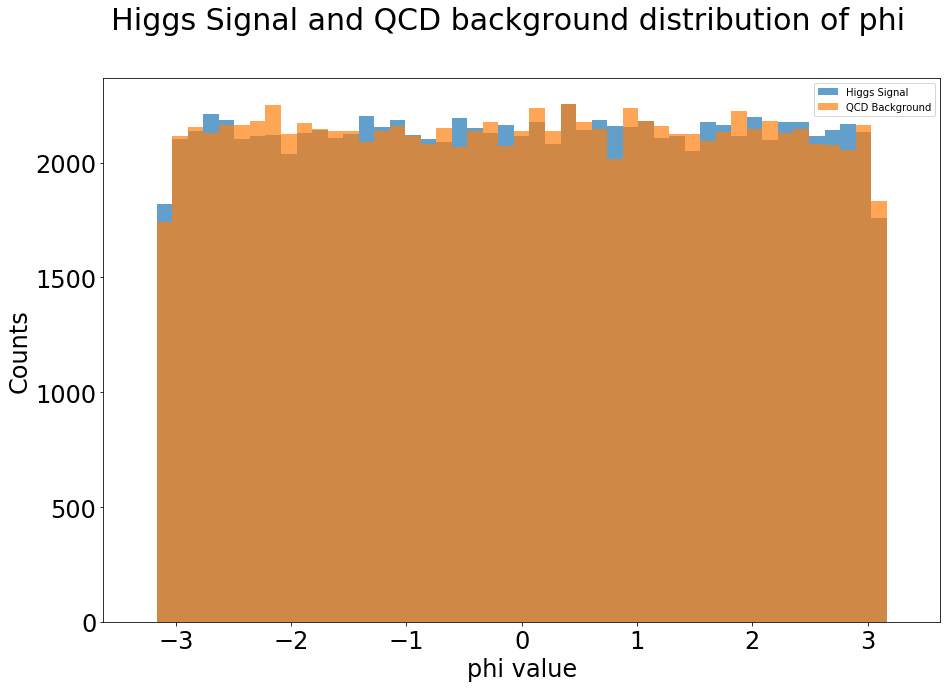

In [128]:
plt.suptitle('Higgs Signal and QCD background distribution of phi', fontsize=30)
plt.xlabel('phi value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['phi'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['phi'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [85]:
print(np.max(data_higgs['mass']))
print(np.min(data_higgs['mass']))
print(np.max(data_qcd['mass']))
print(np.min(data_qcd['mass']))

142.43960717193664
8.971221491285528
321.39799320084865
9.292817333809852


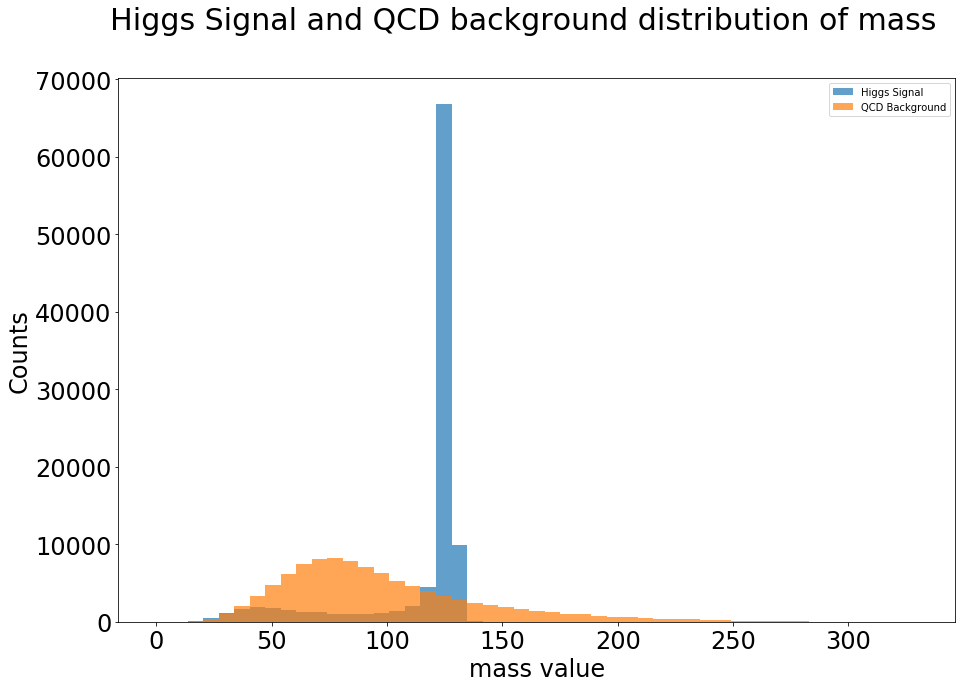

In [129]:
plt.suptitle('Higgs Signal and QCD background distribution of mass', fontsize=30)
plt.xlabel('mass value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['mass'], bins = np.linspace(0,330,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['mass'], bins = np.linspace(0,330,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [87]:
print(np.max(data_higgs['ee2']))
print(np.min(data_higgs['ee2']))
print(np.max(data_qcd['ee2']))
print(np.min(data_qcd['ee2']))

0.3187246305690015
0.006937985295836003
0.49594351112124496
0.0023917195413247693


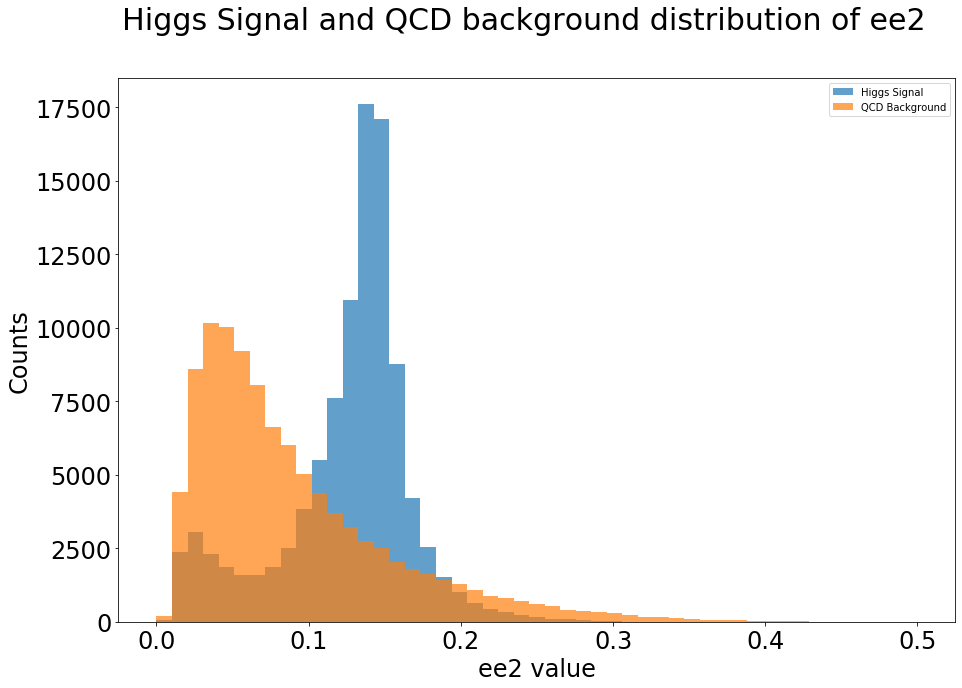

In [130]:
plt.suptitle('Higgs Signal and QCD background distribution of ee2', fontsize=30)
plt.xlabel('ee2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['ee2'], bins = np.linspace(0,0.5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['ee2'], bins = np.linspace(0,0.5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [89]:
print(np.max(data_higgs['ee3']))
print(np.min(data_higgs['ee3']))
print(np.max(data_qcd['ee3']))
print(np.min(data_qcd['ee3']))

0.03004262938313143
2.0410128537758605e-06
0.11627387831954676
6.406593797149574e-07


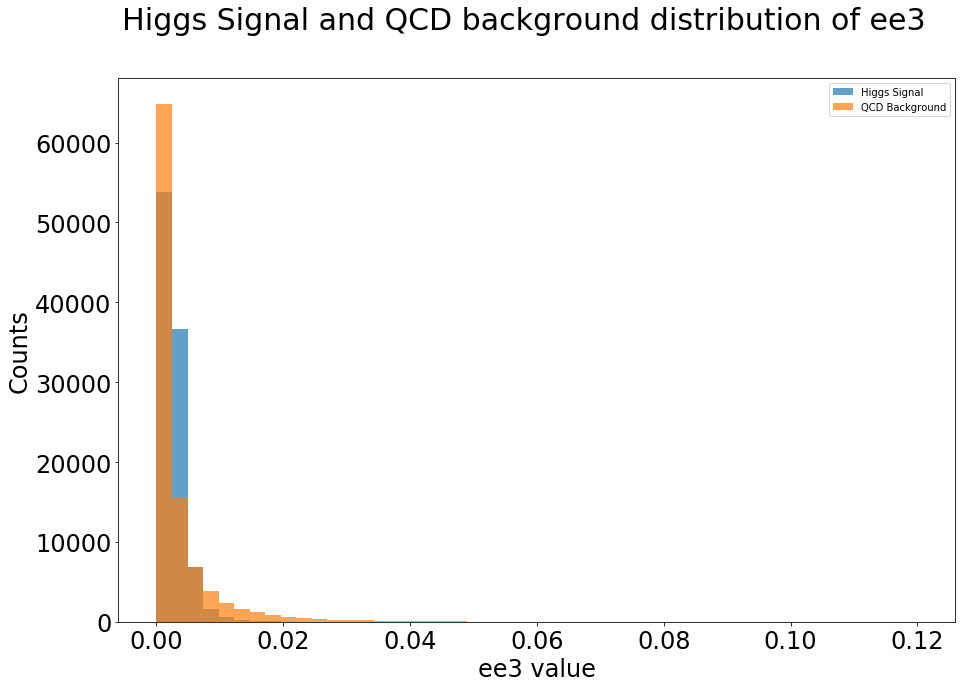

In [131]:
plt.suptitle('Higgs Signal and QCD background distribution of ee3', fontsize=30)
plt.xlabel('ee3 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['ee3'], bins = np.linspace(0,0.12,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['ee3'], bins = np.linspace(0,0.12,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [96]:
print(np.max(data_higgs['d2']))
print(np.min(data_higgs['d2']))
print(np.max(data_qcd['d2']))
print(np.min(data_qcd['d2']))

33.722824368762204
0.27514340988789027
101.15656127003099
0.2813436928759825


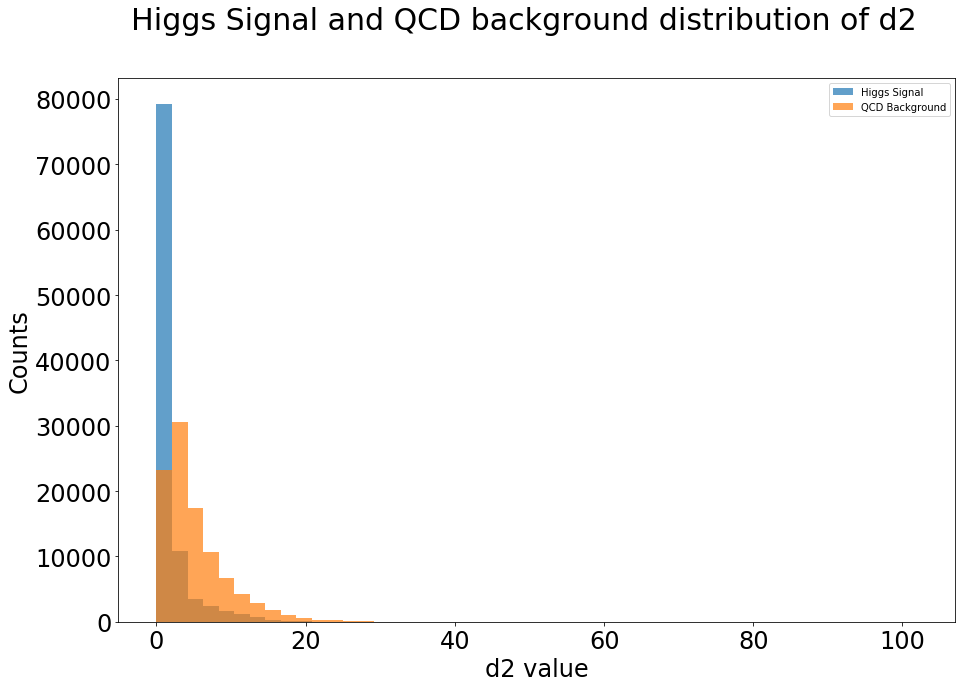

In [132]:
plt.suptitle('Higgs Signal and QCD background distribution of d2', fontsize=30)
plt.xlabel('d2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['d2'], bins = np.linspace(0,102,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['d2'], bins = np.linspace(0,102,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [99]:
print(np.max(data_higgs['angularity']))
print(np.min(data_higgs['angularity']))
print(np.max(data_qcd['angularity']))
print(np.min(data_qcd['angularity']))

0.06048162676069953
1.7552262297103823e-06
0.05360181614278
5.803207257858401e-07


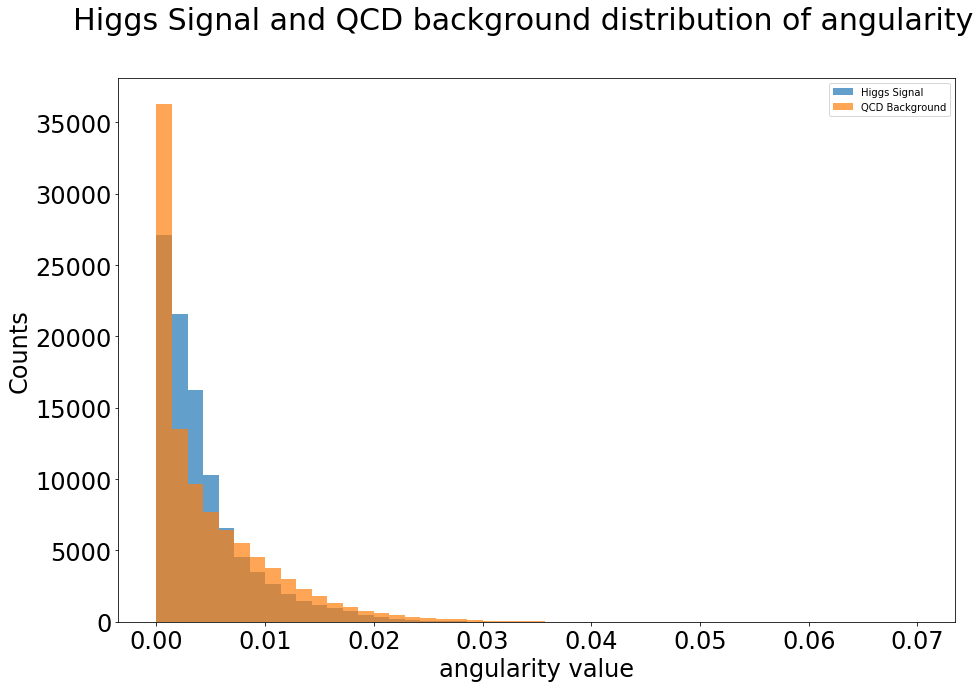

In [133]:
plt.suptitle('Higgs Signal and QCD background distribution of angularity', fontsize=30)
plt.xlabel('angularity value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['angularity'], bins = np.linspace(0,0.07,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['angularity'], bins = np.linspace(0,0.07,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [101]:
print(np.max(data_higgs['t1']))
print(np.min(data_higgs['t1']))
print(np.max(data_qcd['t1']))
print(np.min(data_qcd['t1']))

4.204353099247098
0.4918268863606649
3.9417208201681797
0.39261626205809913


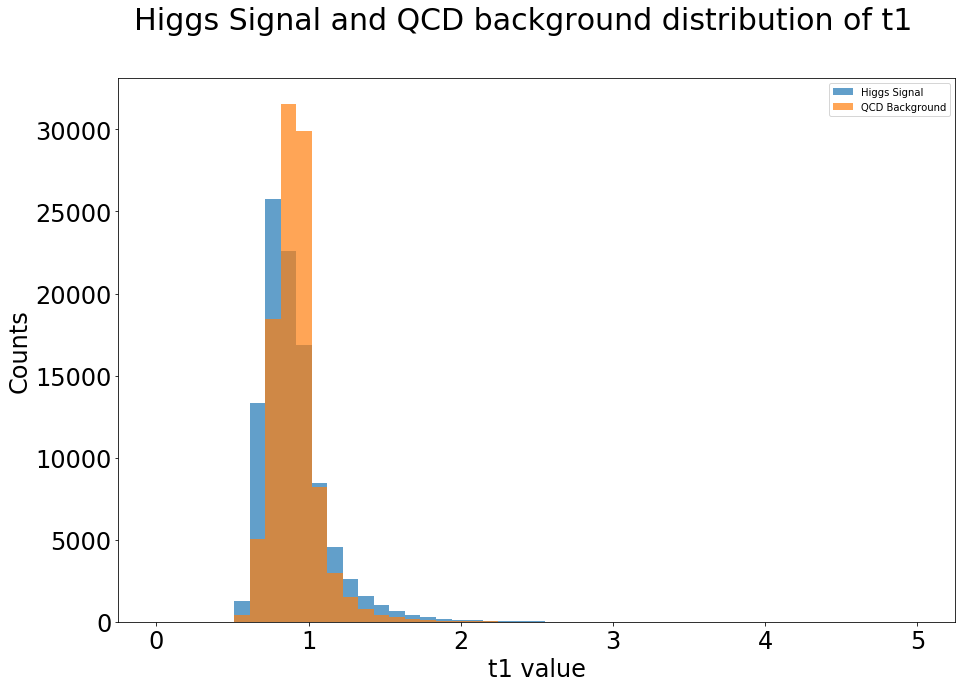

In [134]:
plt.suptitle('Higgs Signal and QCD background distribution of t1', fontsize=30)
plt.xlabel('t1 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t1'], bins = np.linspace(0,5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t1'], bins = np.linspace(0,5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [112]:
print(np.max(data_higgs['t2']))
print(np.min(data_higgs['t2']))
print(np.max(data_qcd['t2']))
print(np.min(data_qcd['t2']))

2.446423676052458
0.051113719486245865
1.7802069782979835
0.04493185052832956


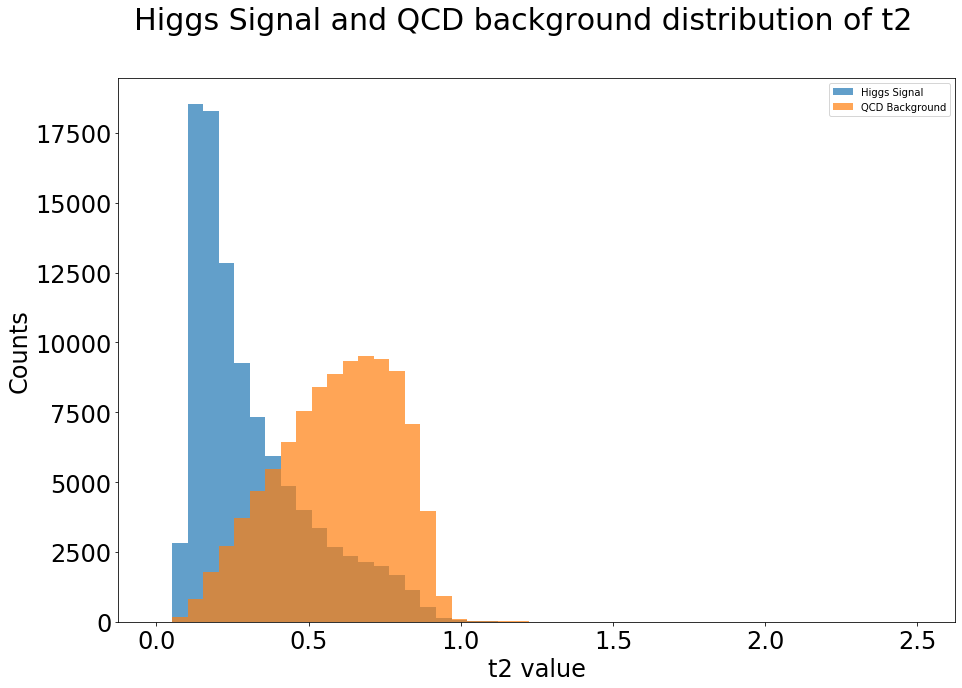

In [135]:
plt.suptitle('Higgs Signal and QCD background distribution of t2', fontsize=30)
plt.xlabel('t2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t2'], bins = np.linspace(0,2.5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t2'], bins = np.linspace(0,2.5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [114]:
print(np.max(data_higgs['t3']))
print(np.min(data_higgs['t3']))
print(np.max(data_qcd['t3']))
print(np.min(data_qcd['t3']))

1.0247762519174504
0.03888651795129442
1.111759027547582
0.02627531362847276


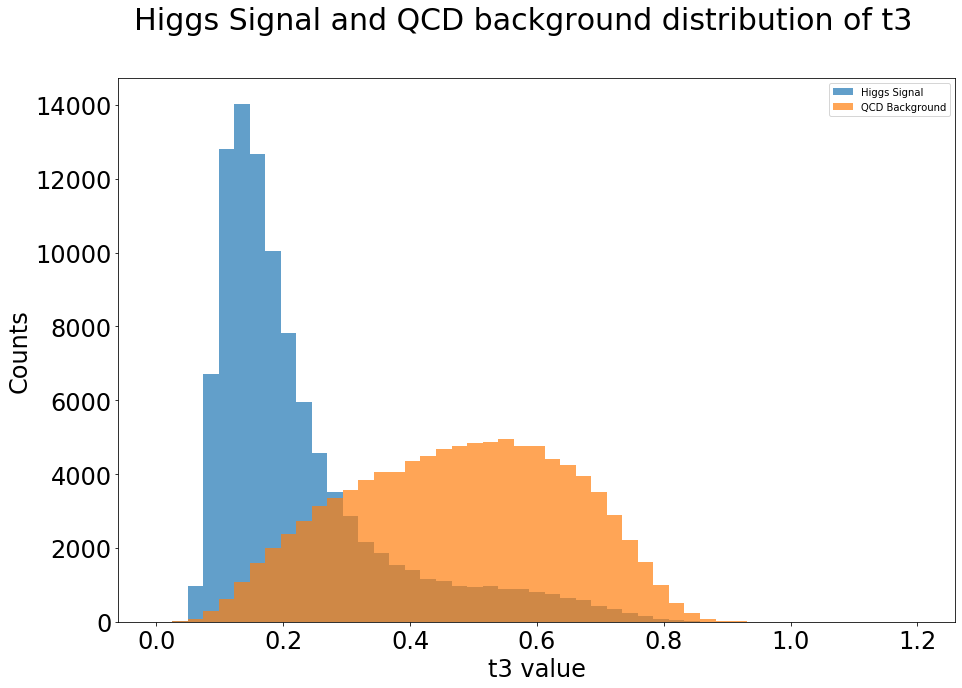

In [136]:
plt.suptitle('Higgs Signal and QCD background distribution of t3', fontsize=30)
plt.xlabel('t3 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t3'], bins = np.linspace(0,1.2,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t3'], bins = np.linspace(0,1.2,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [117]:
print(np.max(data_higgs['t21']))
print(np.min(data_higgs['t21']))
print(np.max(data_qcd['t21']))
print(np.min(data_qcd['t21']))

0.9830459194576445
0.03415972715391194
0.9911035717628249
0.03554390992848359


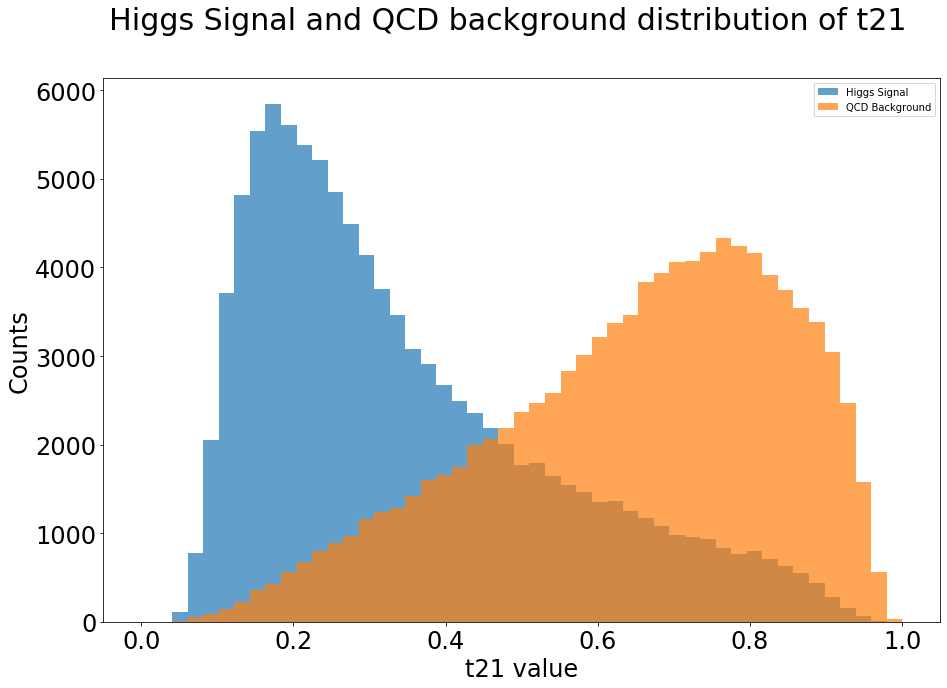

In [137]:
plt.suptitle('Higgs Signal and QCD background distribution of t21', fontsize=30)
plt.xlabel('t21 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t21'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t21'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [120]:
print(np.max(data_higgs['t32']))
print(np.min(data_higgs['t32']))
print(np.max(data_qcd['t32']))
print(np.min(data_qcd['t32']))

0.9817181910020212
0.09019468620813549
0.9882838724529619
0.07701525761578809


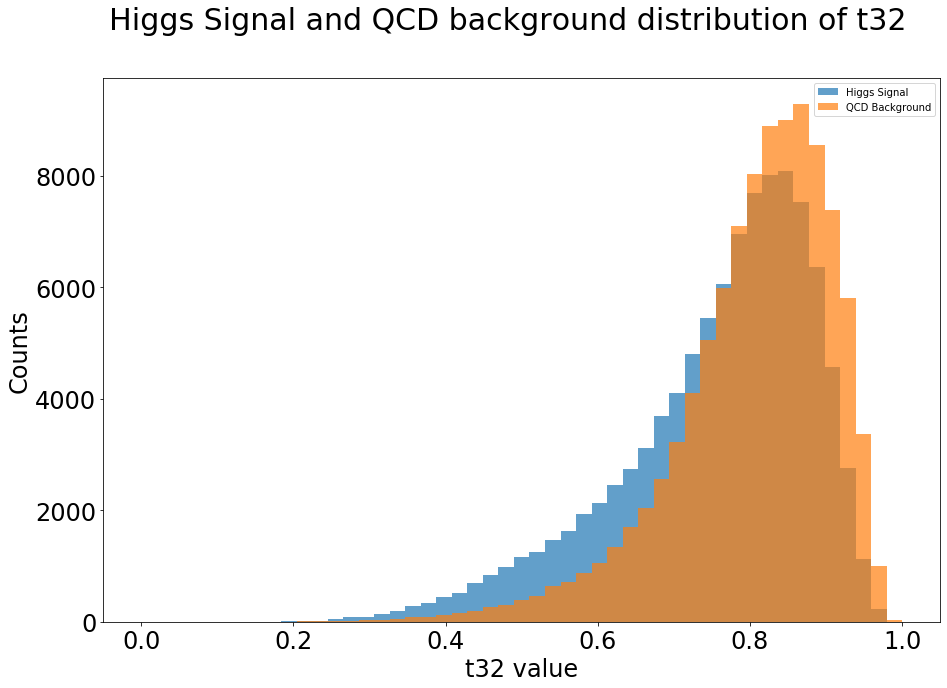

In [138]:
plt.suptitle('Higgs Signal and QCD background distribution of t32', fontsize=30)
plt.xlabel('t32 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t32'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t32'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [123]:
print(np.max(data_higgs['KtDeltaR']))
print(np.min(data_higgs['KtDeltaR']))
print(np.max(data_qcd['KtDeltaR']))
print(np.min(data_qcd['KtDeltaR']))

1.0780744244640545
0.01102668608508021
1.2707496142700903
0.0049696206499564325


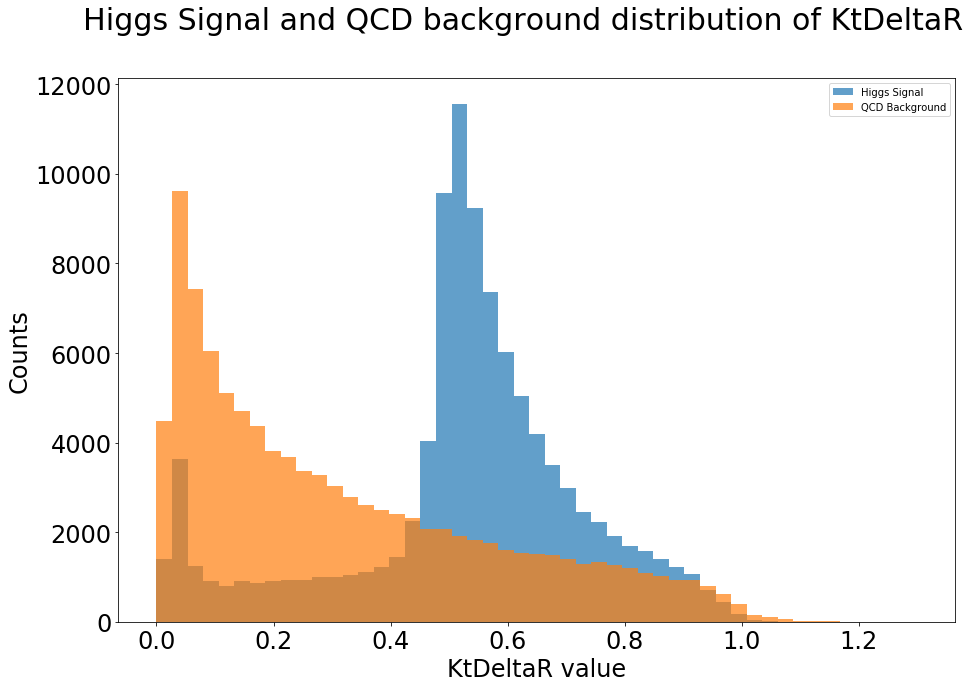

In [139]:
plt.suptitle('Higgs Signal and QCD background distribution of KtDeltaR', fontsize=30)
plt.xlabel('KtDeltaR value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['KtDeltaR'], bins = np.linspace(0,1.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['KtDeltaR'], bins = np.linspace(0,1.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

From the histogram of all the features from the Higgs and QCD data, it appears that not all of the data have discrimination power.
<br>It appears that **pt, mass, ee2, t2, t3, t21 and KtDeltaR*** for the two data have different means and thus have very different distributions.
<br>**eta, ee3, d2, angularity, t1 and t32** for the two data have very similar means and a similar shape in their distribution.
<br>The **phi** histogram for both data is not discernible.

# 2.

I've plotted a histogram against each two of the 14 features, and these are the ones that appeared to have some kind of correlations.

For each of the correlated scatterplot, the first 1000th entries and every 100th entry are plotted and there seem to be no major difference between the two.

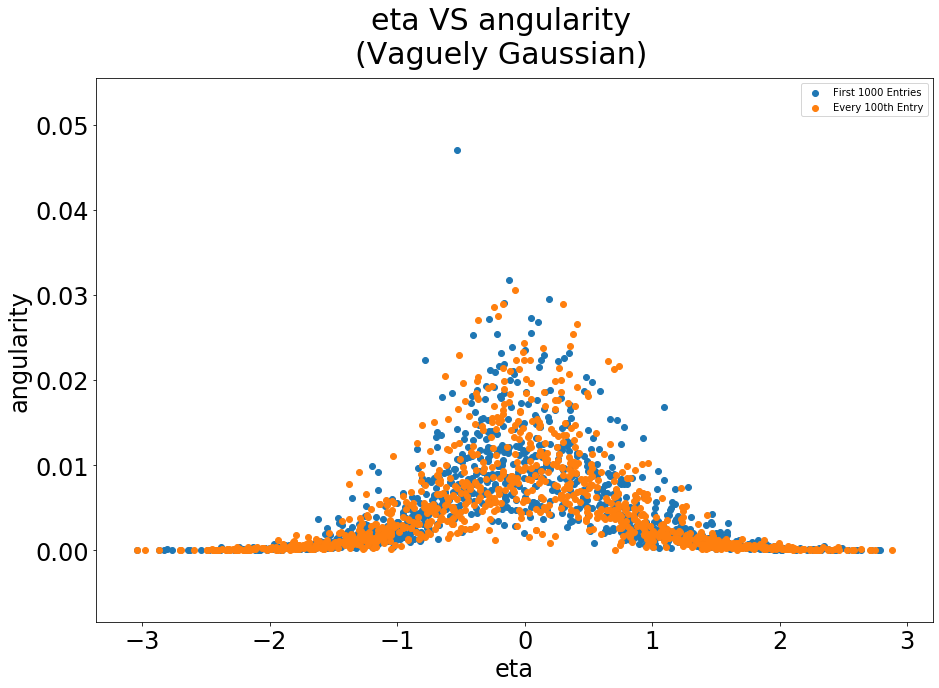

In [276]:
plt.suptitle('eta VS angularity\n(Vaguely Gaussian)', fontsize=30)
plt.xlabel('eta', fontsize = 24)
plt.ylabel('angularity', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['eta'][0:1000], data_qcd['angularity'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['eta'][0::100], data_qcd['angularity'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

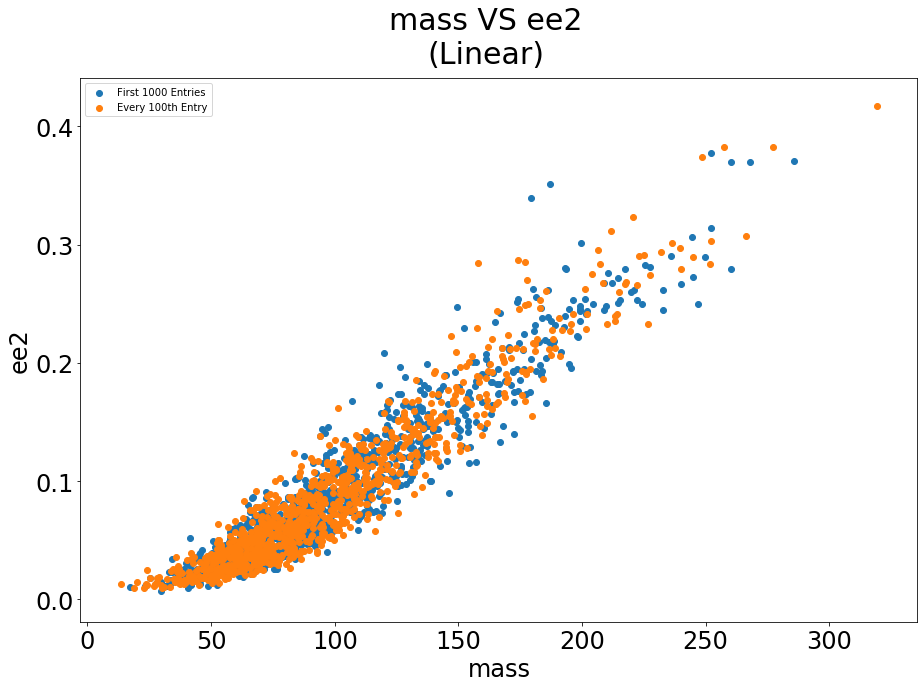

In [277]:
plt.suptitle('mass VS ee2\n(Linear)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('ee2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['ee2'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['ee2'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

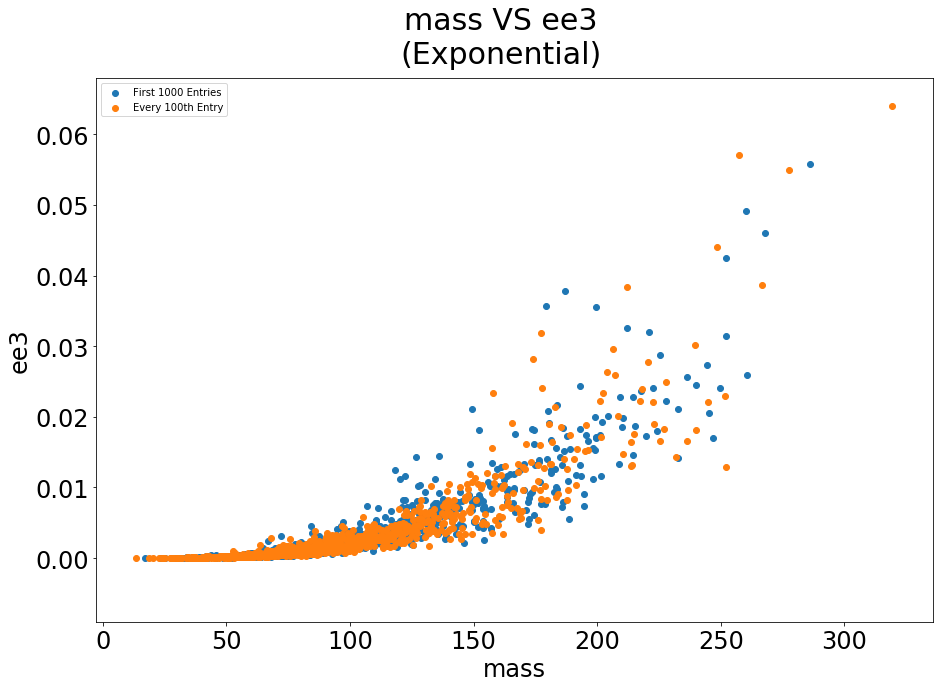

In [279]:
plt.suptitle('mass VS ee3\n(Exponential)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('ee3', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['ee3'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['ee3'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

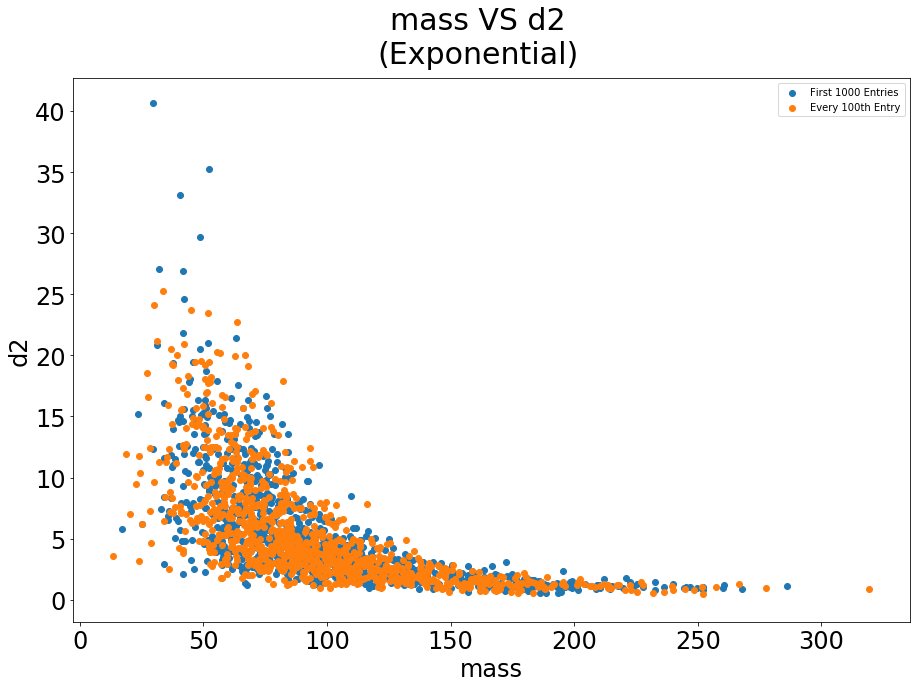

In [280]:
plt.suptitle('mass VS d2\n(Exponential)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('d2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['d2'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['d2'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

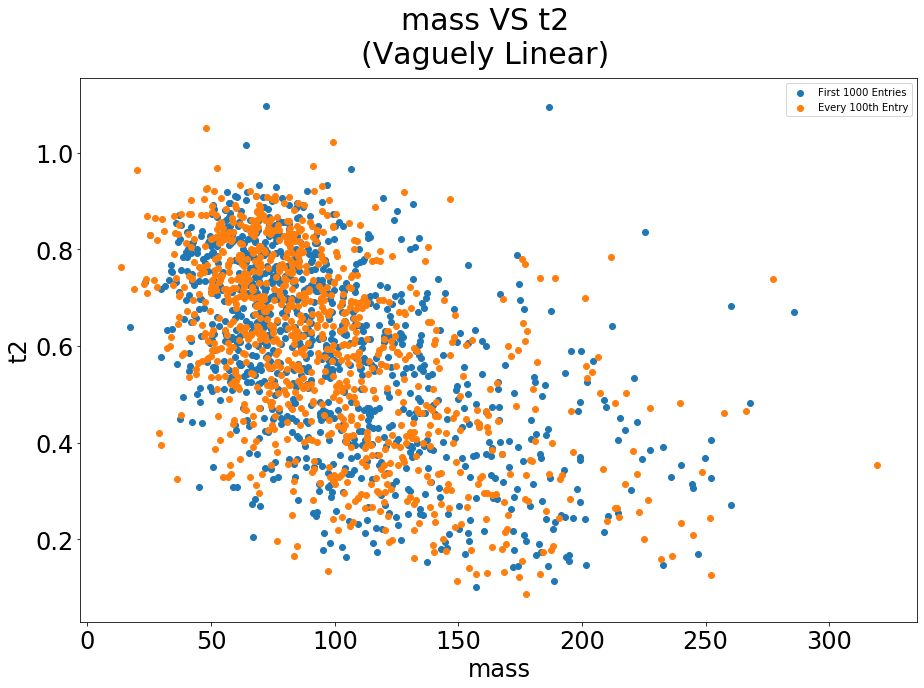

In [282]:
plt.suptitle('mass VS t2\n(Vaguely Linear)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('t2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['t2'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['t2'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

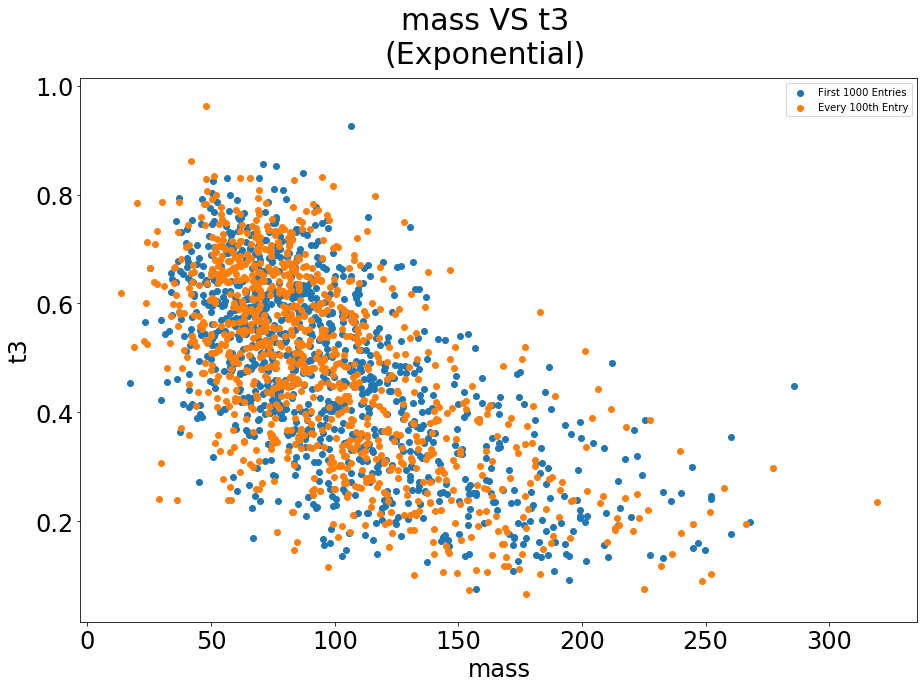

In [283]:
plt.suptitle('mass VS t3\n(Exponential)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('t3', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['t3'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['t3'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

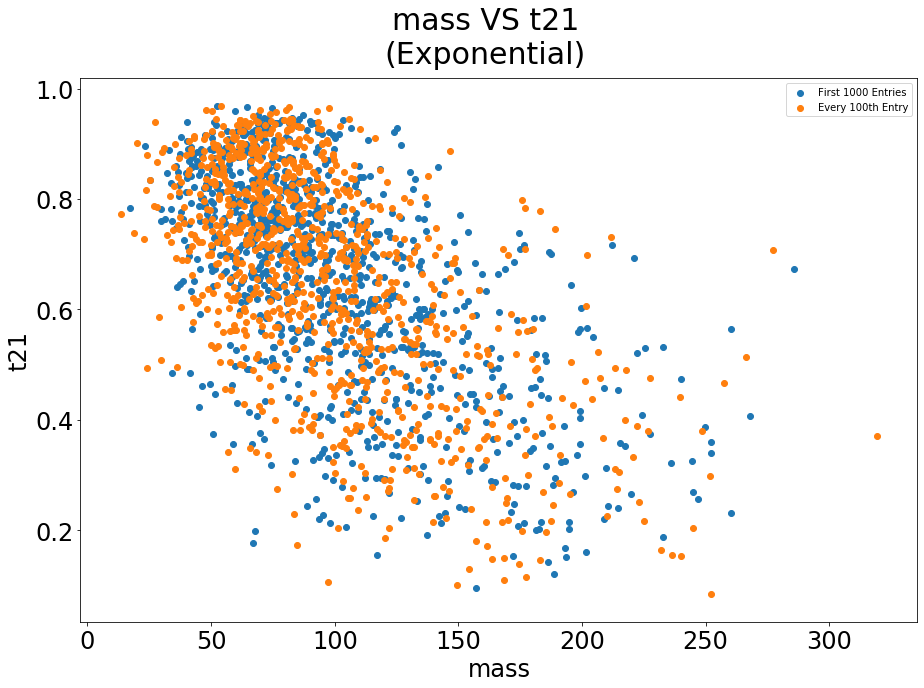

In [286]:
plt.suptitle('mass VS t21\n(Exponential)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('t21', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['t21'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['t21'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

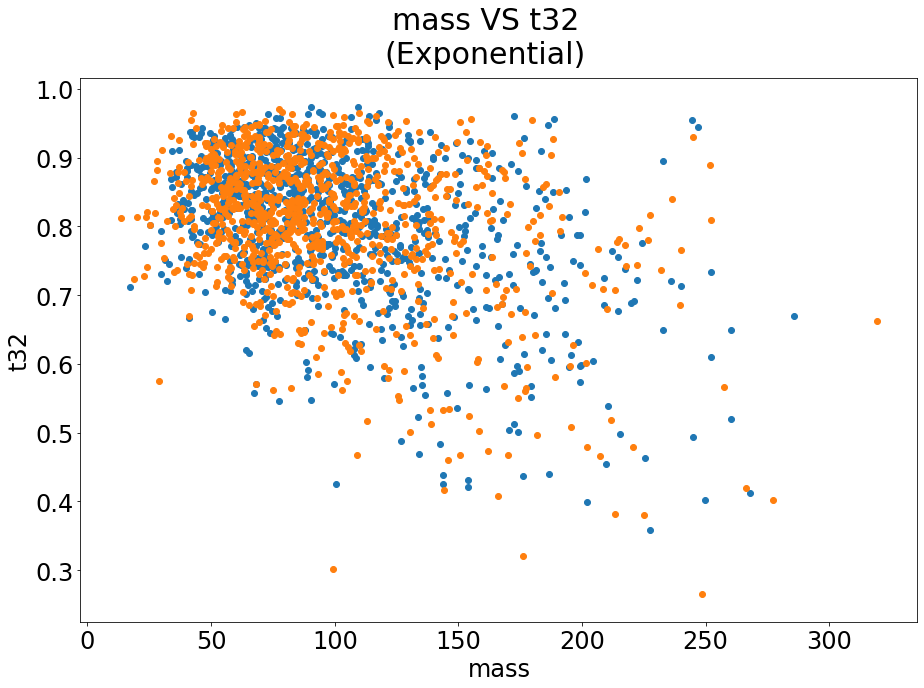

In [287]:
plt.suptitle('mass VS t32\n(Exponential)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('t32', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['t32'][0:1000])
plt.scatter(data_qcd['mass'][0::100], data_qcd['t32'][0::100])

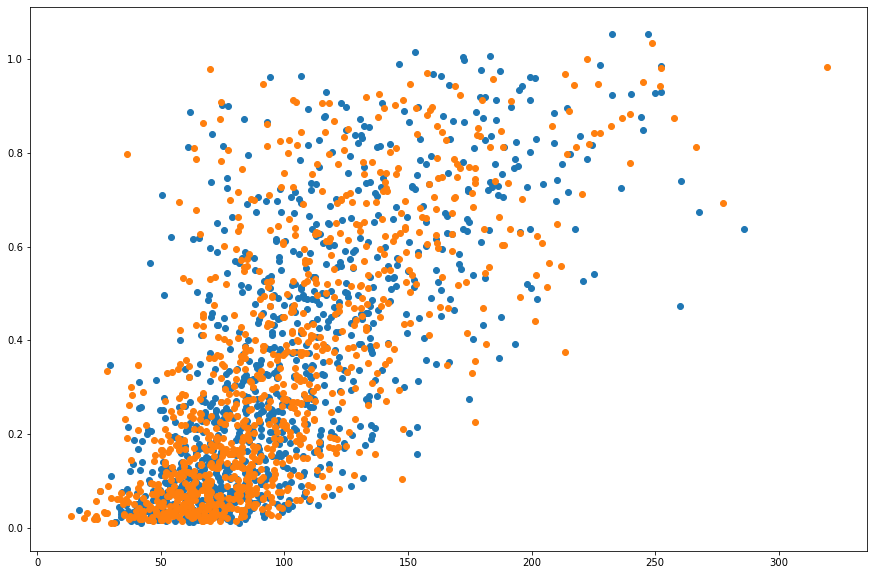

In [252]:
plt.scatter(data_qcd['mass'][0:1000], data_qcd['KtDeltaR'][0:1000])
plt.scatter(data_qcd['mass'][0::100], data_qcd['KtDeltaR'][0::100])

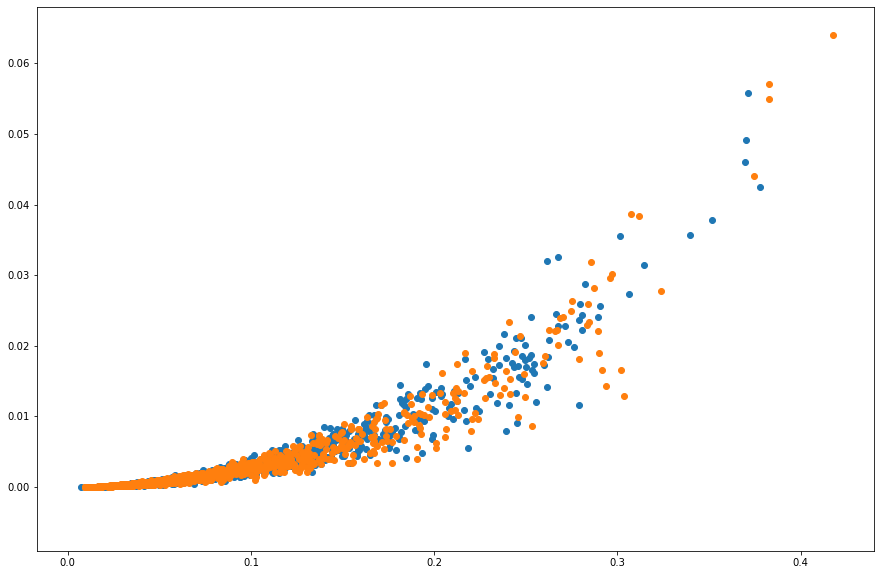

In [242]:
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['ee3'][0:1000])
plt.scatter(data_qcd['ee2'][0::100], data_qcd['ee3'][0::100])

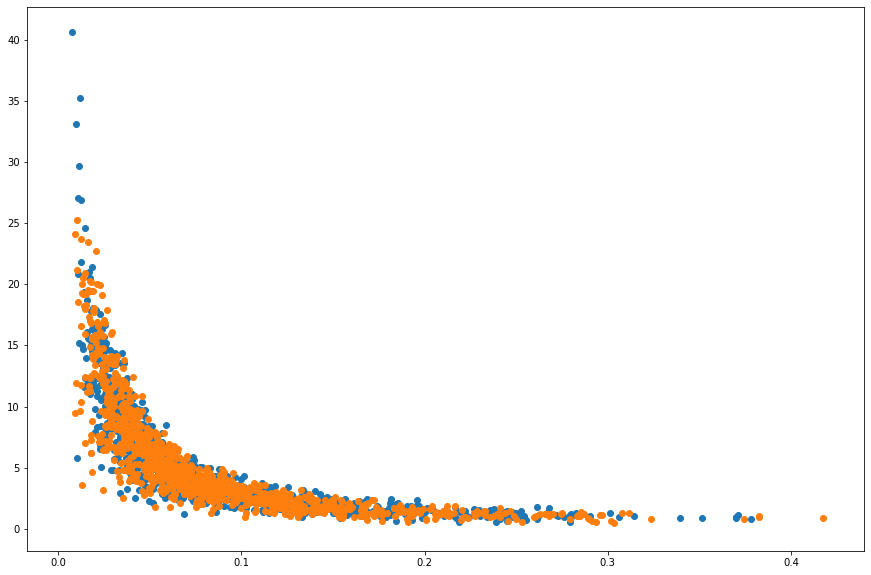

In [253]:
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['d2'][0:1000])
plt.scatter(data_qcd['ee2'][0::100], data_qcd['d2'][0::100])

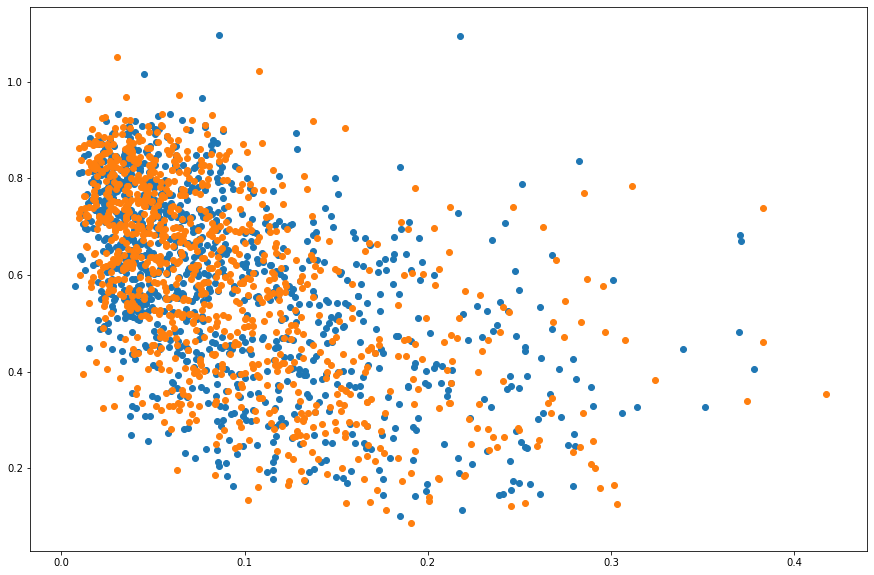

In [254]:
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['t2'][0:1000])
plt.scatter(data_qcd['ee2'][0::100], data_qcd['t2'][0::100])

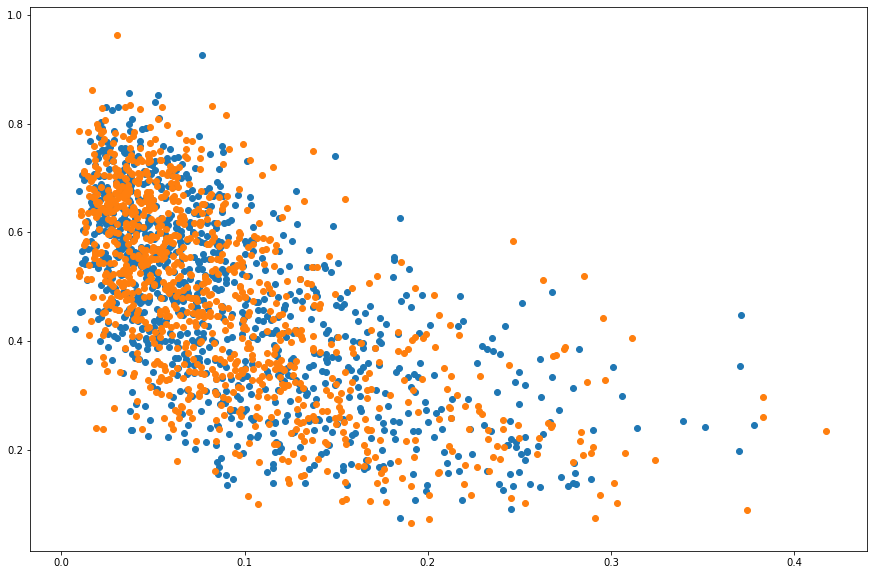

In [255]:
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['t3'][0:1000])
plt.scatter(data_qcd['ee2'][0::100], data_qcd['t3'][0::100])

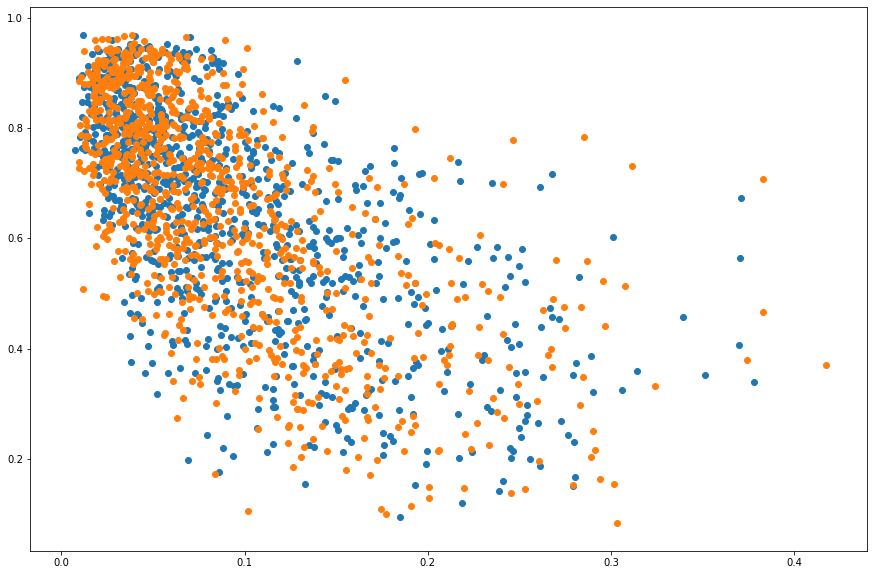

In [256]:
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['t21'][0:1000])
plt.scatter(data_qcd['ee2'][0::100], data_qcd['t21'][0::100])

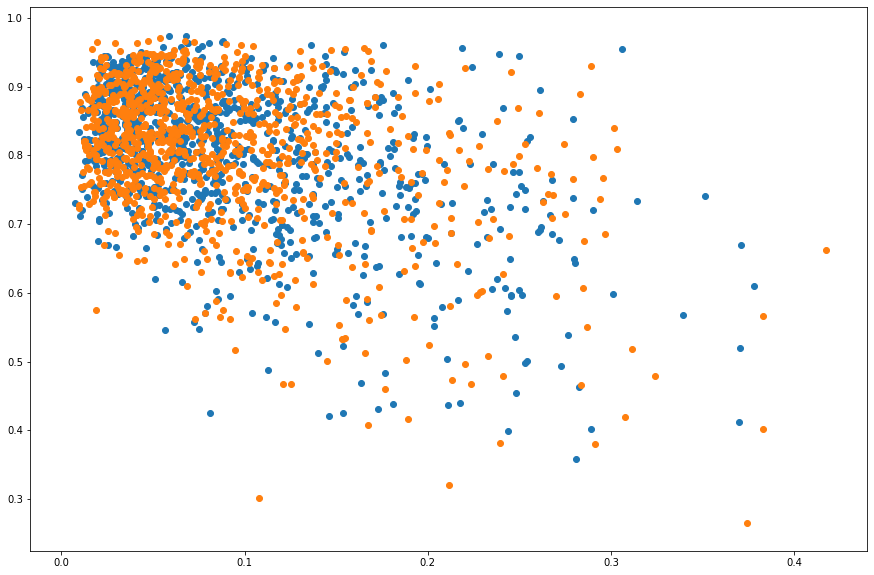

In [257]:
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['t32'][0:1000])
plt.scatter(data_qcd['ee2'][0::100], data_qcd['t32'][0::100])

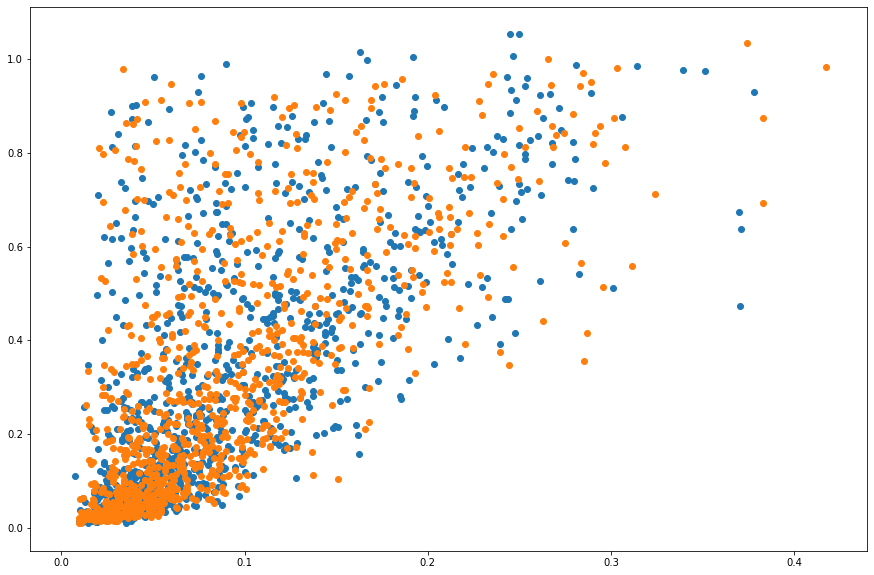

In [258]:
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['KtDeltaR'][0:1000])
plt.scatter(data_qcd['ee2'][0::100], data_qcd['KtDeltaR'][0::100])

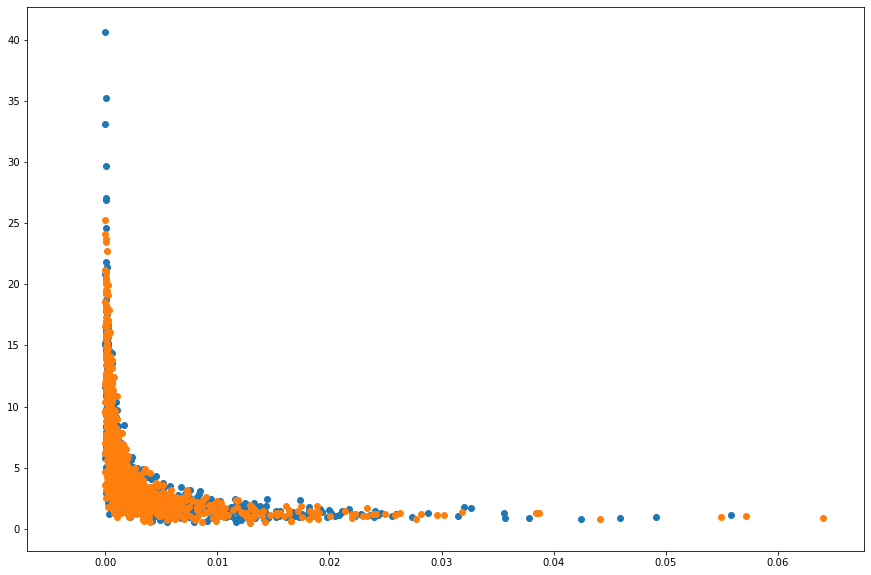

In [259]:
plt.scatter(data_qcd['ee3'][0:1000], data_qcd['d2'][0:1000])
plt.scatter(data_qcd['ee3'][0::100], data_qcd['d2'][0::100])

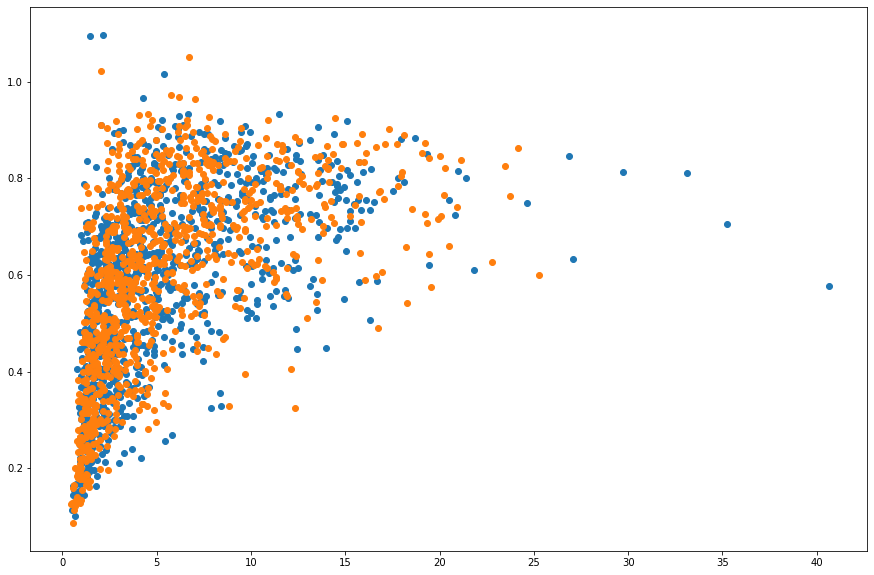

In [261]:
plt.scatter(data_qcd['d2'][0:1000], data_qcd['t2'][0:1000])
plt.scatter(data_qcd['d2'][0::100], data_qcd['t2'][0::100])

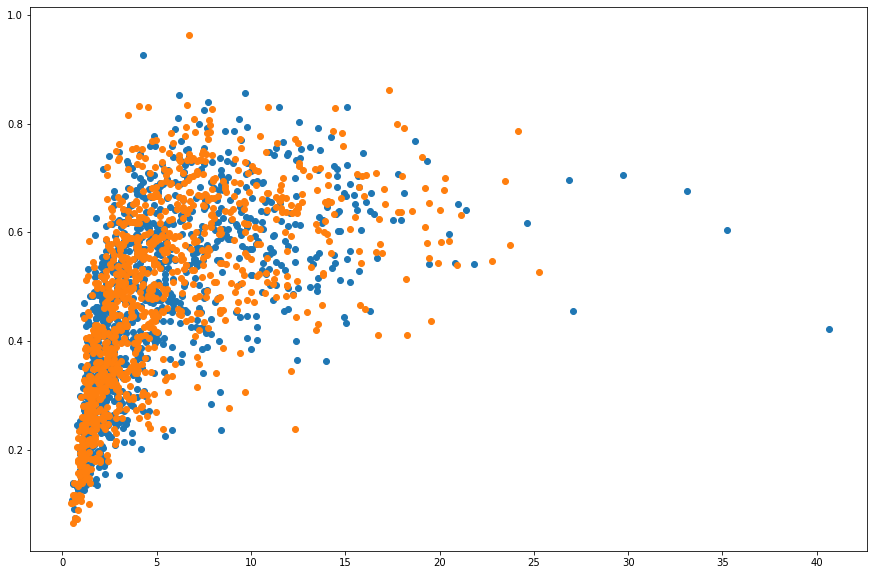

In [262]:
plt.scatter(data_qcd['d2'][0:1000], data_qcd['t3'][0:1000])
plt.scatter(data_qcd['d2'][0::100], data_qcd['t3'][0::100])

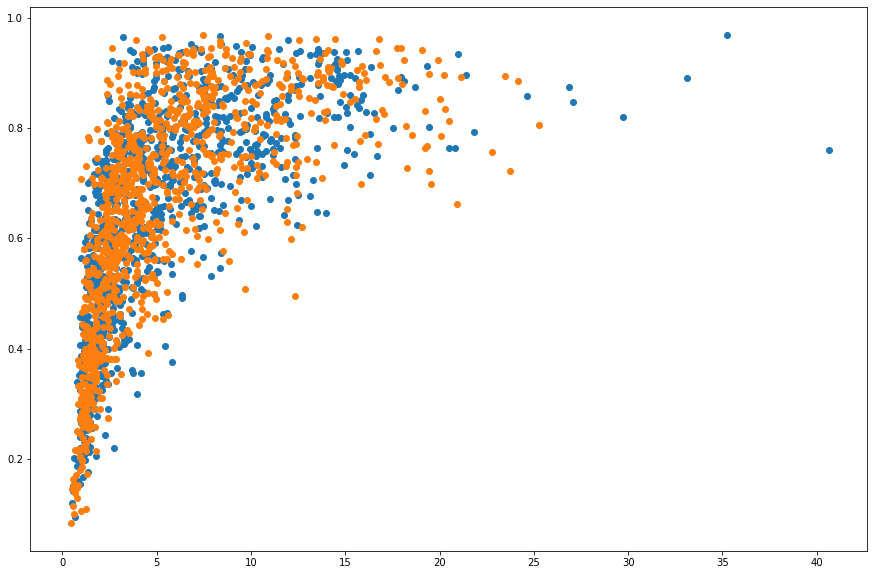

In [263]:
plt.scatter(data_qcd['d2'][0:1000], data_qcd['t21'][0:1000])
plt.scatter(data_qcd['d2'][0::100], data_qcd['t21'][0::100])

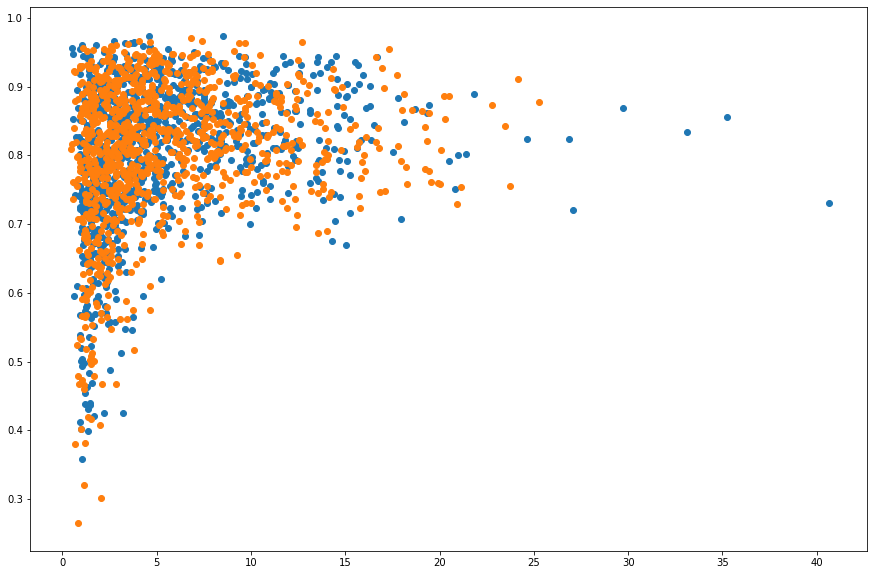

In [264]:
plt.scatter(data_qcd['d2'][0:1000], data_qcd['t32'][0:1000])
plt.scatter(data_qcd['d2'][0::100], data_qcd['t32'][0::100])

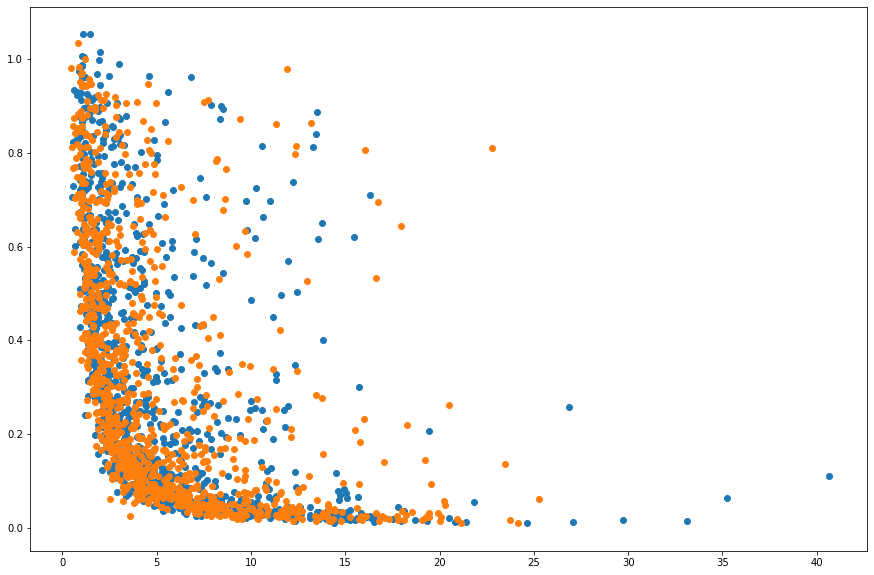

In [265]:
plt.scatter(data_qcd['d2'][0:1000], data_qcd['KtDeltaR'][0:1000])
plt.scatter(data_qcd['d2'][0::100], data_qcd['KtDeltaR'][0::100])

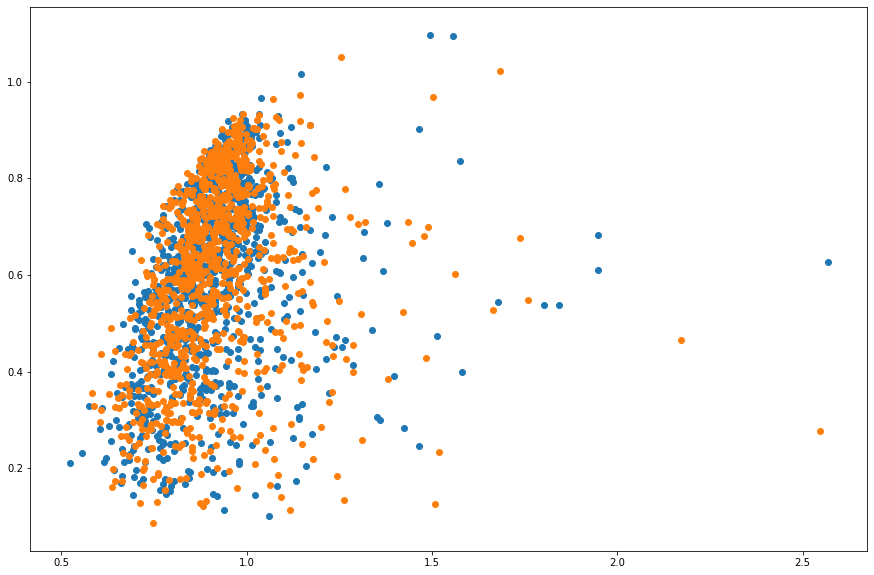

In [266]:
plt.scatter(data_qcd['t1'][0:1000], data_qcd['t2'][0:1000])
plt.scatter(data_qcd['t1'][0::100], data_qcd['t2'][0::100])

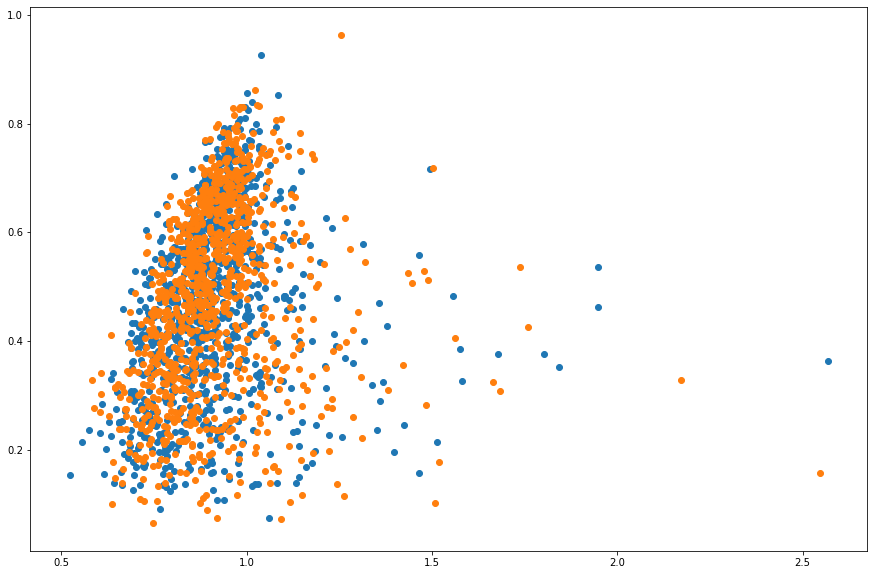

In [267]:
plt.scatter(data_qcd['t1'][0:1000], data_qcd['t3'][0:1000])
plt.scatter(data_qcd['t1'][0::100], data_qcd['t3'][0::100])

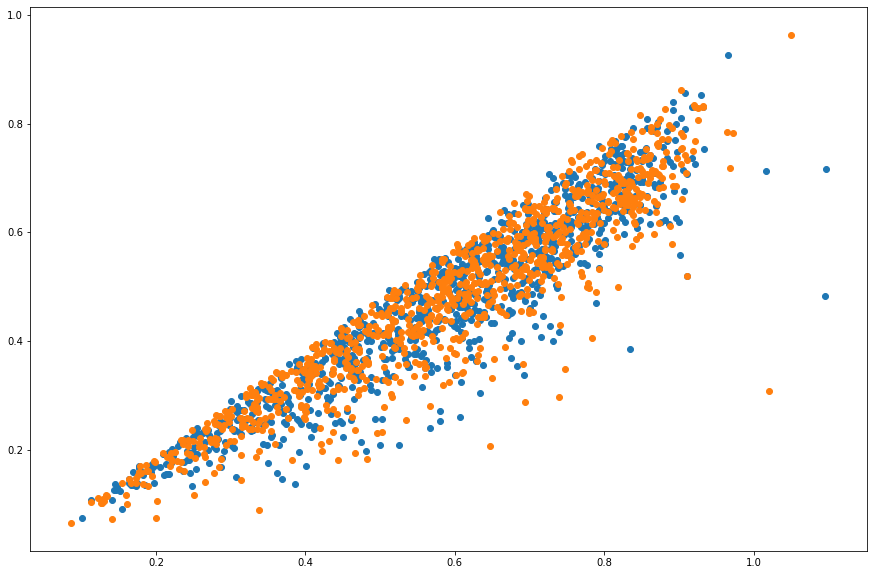

In [268]:
plt.scatter(data_qcd['t2'][0:1000], data_qcd['t3'][0:1000])
plt.scatter(data_qcd['t2'][0::100], data_qcd['t3'][0::100])

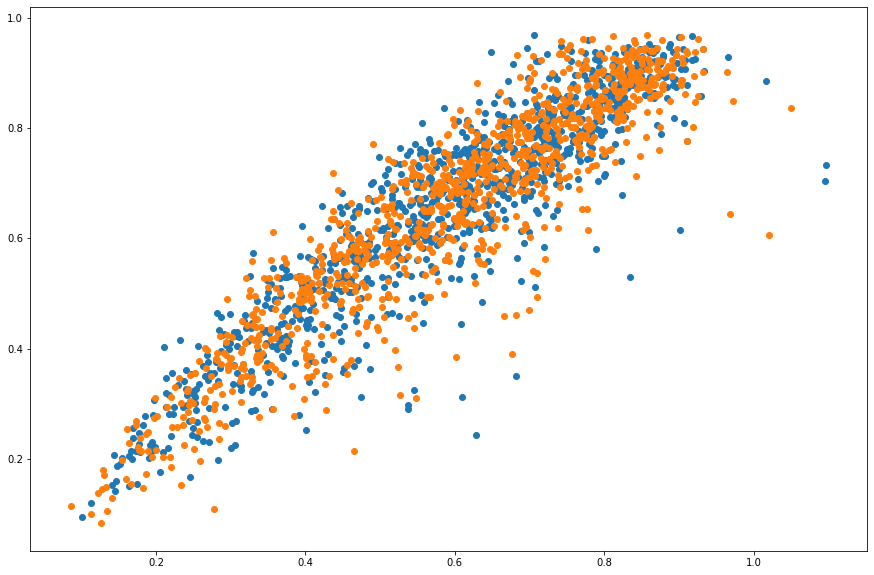

In [269]:
plt.scatter(data_qcd['t2'][0:1000], data_qcd['t21'][0:1000])
plt.scatter(data_qcd['t2'][0::100], data_qcd['t21'][0::100])

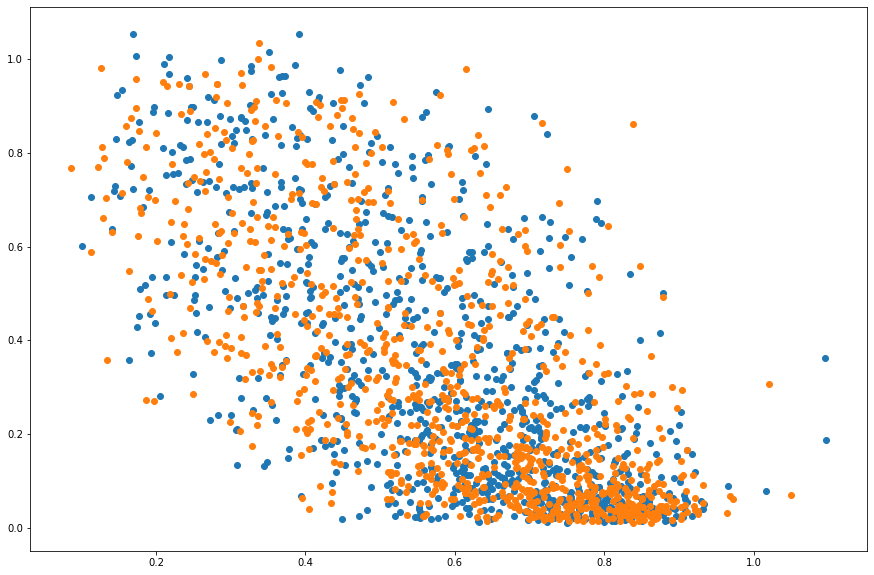

In [270]:
plt.scatter(data_qcd['t2'][0:1000], data_qcd['KtDeltaR'][0:1000])
plt.scatter(data_qcd['t2'][0::100], data_qcd['KtDeltaR'][0::100])

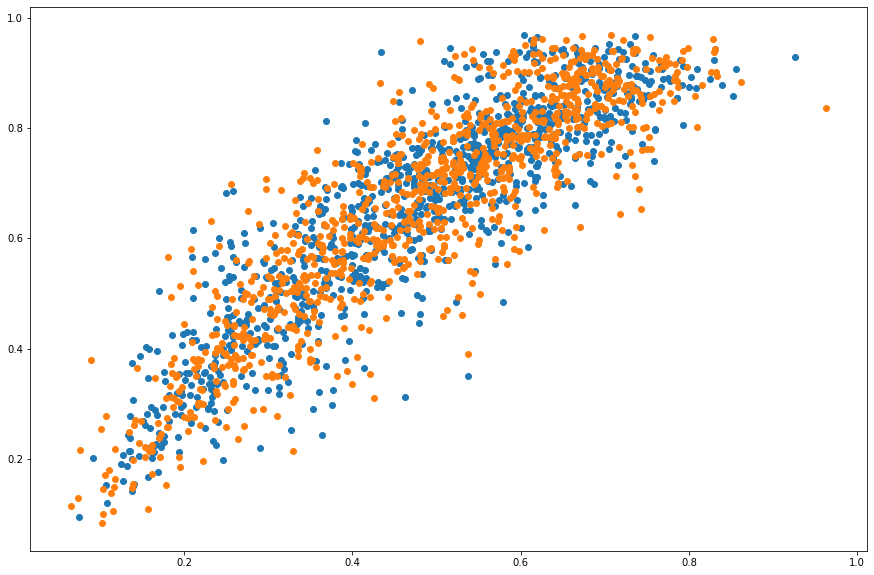

In [271]:
plt.scatter(data_qcd['t3'][0:1000], data_qcd['t21'][0:1000])
plt.scatter(data_qcd['t3'][0::100], data_qcd['t21'][0::100])

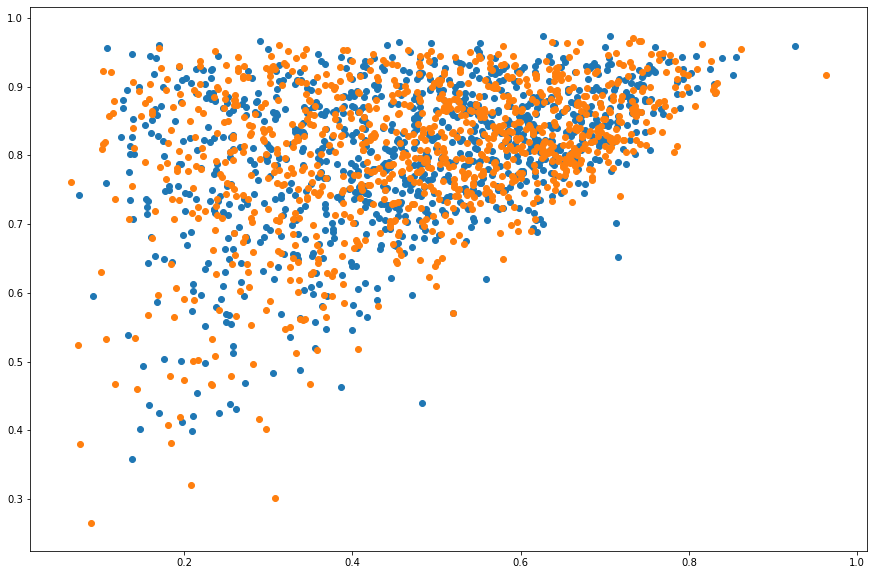

In [272]:
plt.scatter(data_qcd['t3'][0:1000], data_qcd['t32'][0:1000])
plt.scatter(data_qcd['t3'][0::100], data_qcd['t32'][0::100])

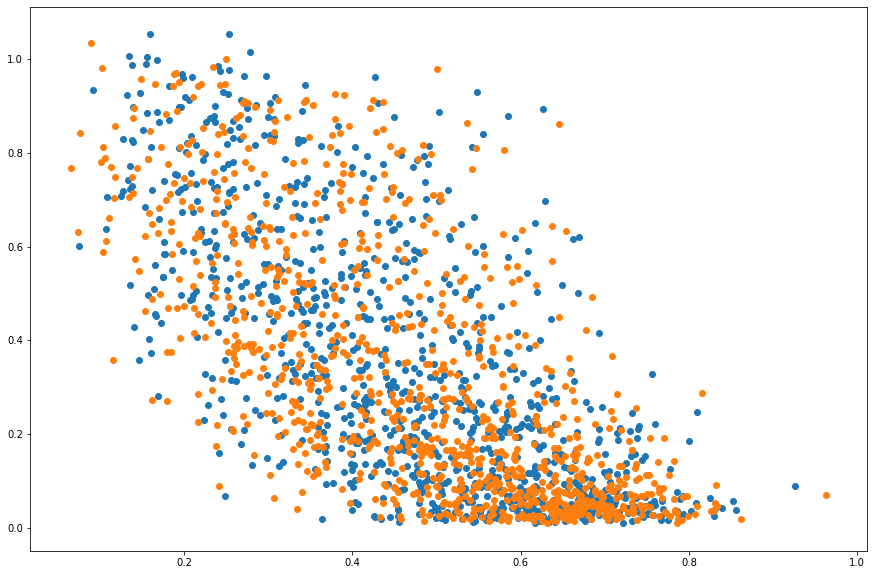

In [273]:
plt.scatter(data_qcd['t3'][0:1000], data_qcd['KtDeltaR'][0:1000])
plt.scatter(data_qcd['t3'][0::100], data_qcd['KtDeltaR'][0::100])

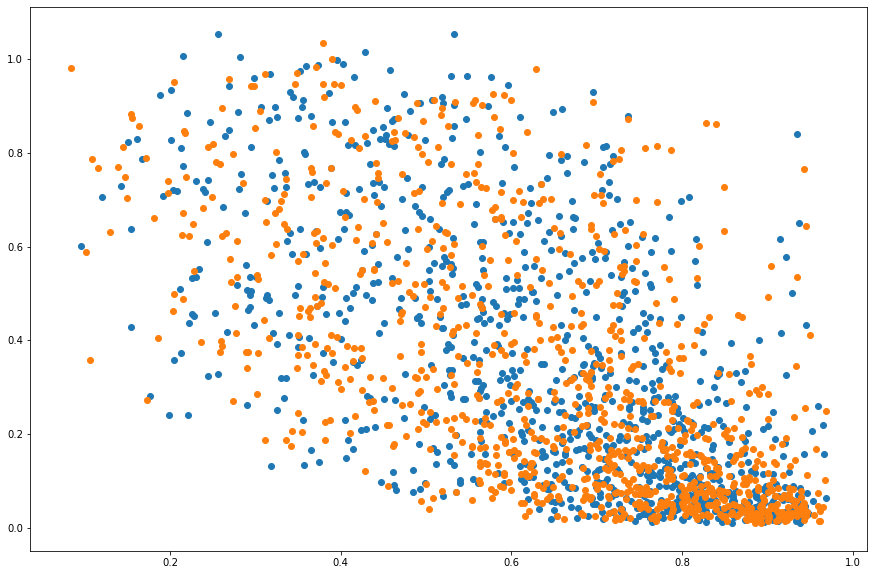

In [274]:
plt.scatter(data_qcd['t21'][0:1000], data_qcd['KtDeltaR'][0:1000])
plt.scatter(data_qcd['t21'][0::100], data_qcd['KtDeltaR'][0::100])

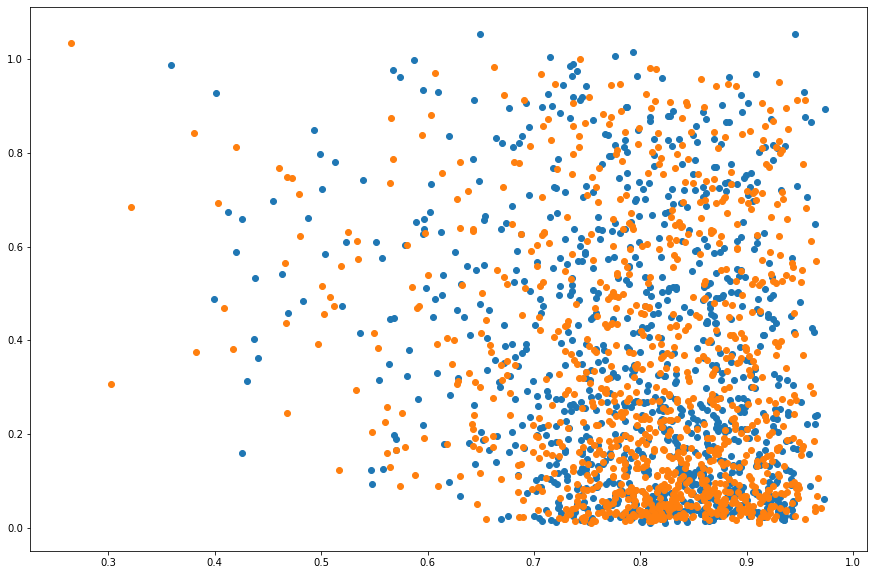

In [275]:
plt.scatter(data_qcd['t32'][0:1000], data_qcd['KtDeltaR'][0:1000])
plt.scatter(data_qcd['t32'][0::100], data_qcd['KtDeltaR'][0::100])

energy correlation function